In [1]:
import pickle

routes = pickle.load( open( "save.p", "rb" ) )

In [2]:
routes

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,polyline array
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...","[[41.154489, -8.630838], [41.154498, -8.630829..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...","[[41.170671, -8.66574], [41.170635, -8.665767]..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...","[[41.14053, -8.61597], [41.140863, -8.617365],..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...","[[41.142915, -8.607996], [41.142915, -8.608005..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...","[[41.178087, -8.687268], [41.178078, -8.687259..."
5,1372636965620000231,C,NaN,NaN,20000231,1372636965,A,False,"[[-8.615502,41.140674],[-8.614854,41.140926],[...","[[41.160717, -8.578224], [41.159439, -8.578521..."
6,1372637210620000456,C,NaN,NaN,20000456,1372637210,A,False,"[[-8.57952,41.145948],[-8.580942,41.145039],[-...","[[41.142816, -8.603973], [41.142798, -8.603982..."
7,1372637299620000011,C,NaN,NaN,20000011,1372637299,A,False,"[[-8.617563,41.146182],[-8.617527,41.145849],[...","[[41.161554, -8.6247], [41.161545, -8.624727],..."
8,1372637274620000403,C,NaN,NaN,20000403,1372637274,A,False,"[[-8.611794,41.140557],[-8.611785,41.140575],[...","[[41.163309, -8.589402], [41.163453, -8.589924..."
9,1372637905620000320,C,NaN,NaN,20000320,1372637905,A,False,"[[-8.615907,41.140557],[-8.614449,41.141088],[...","[[41.134158, -8.604594], [41.134176, -8.604603..."


In [3]:
routes['duration'] = (routes['polyline array'].str.len()-1)*15/60

## Plot routes

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

Wall time: 2.62 s


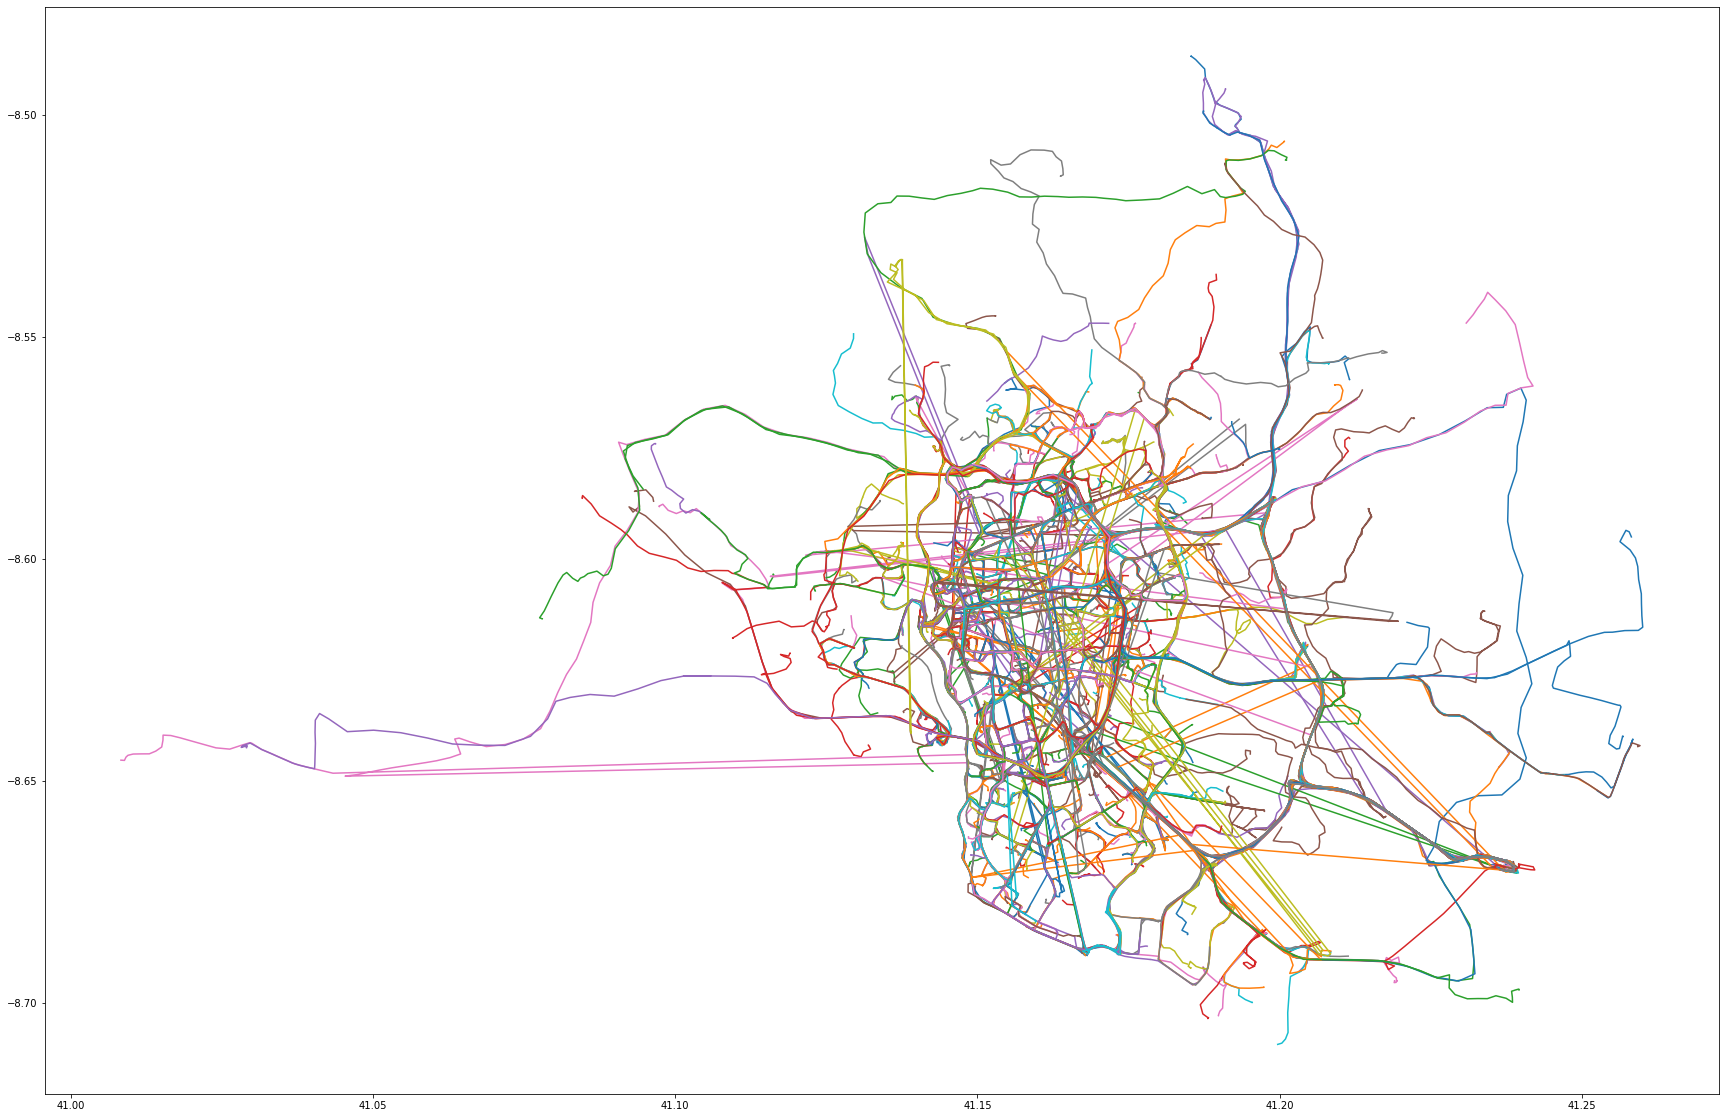

In [5]:
%%time
plt.figure(figsize=(30,20))

for route in routes['polyline array'].iloc[:1000]:
    plt.plot(*zip(*route))

## Identify Missing data

In [6]:
routes['length'] = routes['polyline array'].str.len()

In [7]:
routes = routes[(routes.length != 0 ) & (routes.MISSING_DATA != True)]

In [8]:
#remove outlier length
routes = routes[routes.length <= 75]

In [9]:
sample = routes['polyline array'].iloc[0]

In [17]:
import numpy as np
stack = np.vstack(routes['polyline array'].to_list())

In [25]:
x = [coordinate[0] for coordinate in stack]
y = [coordinate[1] for coordinate in stack]

In [84]:
y_min = min(y)
y_max = max(y)

x_min = min(x)
x_max = max(x)

In [103]:
bin_num = 1000000

y_bins = np.linspace(y_min, y_max, bin_num)
x_bins = np.linspace(x_min, x_max, bin_num)

In [108]:
def bins(array):
    x_coor = [coor[0] for coor in array]
    y_coor = [coor[1] for coor in array]
    
    x_grid = np.digitize(x_coor, x_bins)
    y_grid = np.digitize(y_coor, y_bins)
    
    return x_grid, y_grid

In [113]:
routes['x_bin'], routes['y_bin'] = zip(*routes['polyline array'].map(bins))

In [114]:
 routes

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,polyline array,duration,length,x_min,y_min,x_max,y_max,x_bin,y_bin
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...","[[41.154489, -8.630838], [41.154498, -8.630829...",5.50,23,41.141376,-8.632746,41.154516,-8.618499,"[481091, 481091, 481092, 481092, 481091, 48101...","[314904, 314904, 314904, 314904, 314900, 31488..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...","[[41.170671, -8.66574], [41.170635, -8.665767]...",4.50,19,41.159826,-8.670942,41.170671,-8.639847,"[481940, 481939, 481906, 481852, 481798, 48172...","[314515, 314515, 314505, 314489, 314472, 31445..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...","[[41.14053, -8.61597], [41.140863, -8.617365],...",16.00,65,41.140278,-8.650395,41.154507,-8.596530,"[480358, 480375, 480433, 480509, 480564, 48058...","[315069, 315054, 315031, 315010, 314979, 31495..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...","[[41.142915, -8.607996], [41.142915, -8.608005...",10.50,43,41.142555,-8.610849,41.151960,-8.574660,"[480483, 480483, 480482, 480481, 480478, 48047...","[315158, 315158, 315158, 315158, 315158, 31515..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...","[[41.178087, -8.687268], [41.178078, -8.687259...",7.00,29,41.171841,-8.689086,41.180517,-8.645949,"[482330, 482329, 482314, 482260, 482251, 48224...","[314276, 314276, 314276, 314273, 314256, 31425..."
5,1372636965620000231,C,NaN,NaN,20000231,1372636965,A,False,"[[-8.615502,41.140674],[-8.614854,41.140926],[...","[[41.160717, -8.578224], [41.159439, -8.578521...",6.25,26,41.140008,-8.615502,41.160717,-8.577594,"[481418, 481351, 481259, 481184, 481167, 48114...","[315490, 315486, 315485, 315484, 315464, 31544..."
6,1372637210620000456,C,NaN,NaN,20000456,1372637210,A,False,"[[-8.57952,41.145948],[-8.580942,41.145039],[-...","[[41.142816, -8.603973], [41.142798, -8.603982...",8.75,36,41.142681,-8.604945,41.150970,-8.579520,"[480478, 480477, 480477, 480471, 480477, 48051...","[315203, 315203, 315203, 315211, 315222, 31520..."
7,1372637299620000011,C,NaN,NaN,20000011,1372637299,A,False,"[[-8.617563,41.146182],[-8.617527,41.145849],[...","[[41.161554, -8.6247], [41.161545, -8.624727],...",8.25,34,41.144832,-8.624736,41.161563,-8.615142,"[481462, 481461, 481461, 481461, 481461, 48146...","[314972, 314972, 314972, 314972, 314972, 31497..."
8,1372637274620000403,C,NaN,NaN,20000403,1372637274,A,False,"[[-8.611794,41.140557],[-8.611785,41.140575],[...","[[41.163309, -8.589402], [41.163453, -8.589924...",9.25,38,41.140341,-8.615844,41.163453,-8.589402,"[481554, 481561, 481465, 481337, 481230, 48116...","[315365, 315359, 315342, 315325, 315312, 31530..."
9,1372637905620000320,C,NaN,NaN,20000320,1372637905,A,False,"[[-8.615907,41.140557],[-8.614449,41.141088],[...","[[41.134158, -8.604594], [41.134176, -8.604603...",4.50,19,41.134158,-8.615907,41.141430,-8.604594,"[480023, 480024, 480036, 480043, 480044, 48004...","[315196, 315196, 315186, 315165, 315161, 31516..."


In [ ]:
pickle.dump( routes, open( "save2.p", "wb" ) )